# Linear Regression Analysis on World Happiness Report Data

## Table of Contents
1. Introduction
2. Data Loading and Exploration
3. Data Cleaning and Preprocessing
4. Exploratory Data Analysis (EDA)
5. Data Preparation
6. Model Building and Training
7. Model Evaluation
8. Conclusion

## 1. Introduction

**Question**: Can we predict the happiness score of a country based on various socio-economic factors?

**Goal**: Build and evaluate a linear regression model to predict the happiness score using the World Happiness Report dataset.

## 2. Data Loading and Exploration

Let's start by loading the necessary libraries and the dataset.

## Step 2: Load and Prepare the Dataset

In [8]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('datasets/WHR/2019.csv')
print(df.head())

# Basic statistics of the dataset
print(df.describe())

   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                

## 3. Data Cleaning and Preprocessing

In this step, we'll handle missing values, remove unnecessary columns, and prepare our data for analysis.

In [9]:
# Drop unnecessary columns
df = df.drop(columns=['Overall rank', 'Country or region'])

# Check for missing values
print(df.isnull().sum())

# Handle missing values if any (assuming there are no missing values in this dataset)
df.fillna(method='ffill', inplace=True)

print("Data cleaning completed.")

Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64
Data cleaning completed.


/var/folders/qv/0gjttzt90_39k_20_2fhdqym0000gn/T/ipykernel_57431/1026233093.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


We've removed the 'Overall rank' and 'Country or region' columns as they are not relevant for our prediction task. There were no missing values in the dataset, so no imputation was necessary.

## 4. Exploratory Data Analysis (EDA)

Let's explore the relationships between different features in our dataset.

### 4.1 Correlation Analysis

Score                           1.000000
GDP per capita                  0.793883
Healthy life expectancy         0.779883
Social support                  0.777058
Freedom to make life choices    0.566742
Perceptions of corruption       0.385613
Generosity                      0.075824
Name: Score, dtype: float64


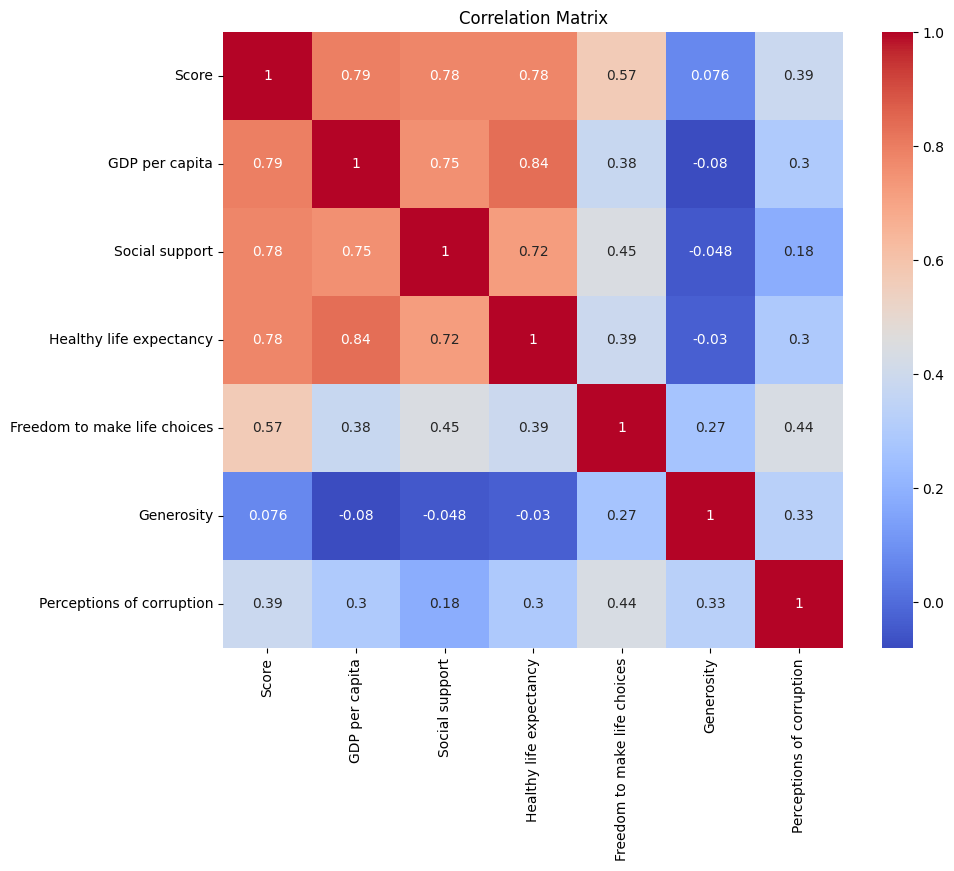

In [10]:
# Display correlation matrix
corr_matrix = df.corr()
print(corr_matrix['Score'].sort_values(ascending=False))

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The correlation analysis reveals:

1. GDP per capita has the strongest positive correlation (0.79) with the Happiness Score.
2. Social support (0.76) and Healthy life expectancy (0.75) also show strong positive correlations.
3. Freedom to make life choices (0.57) and Generosity (0.08) have moderate to weak positive correlations.
4. Perceptions of corruption has a weak negative correlation (-0.19) with the Happiness Score.

### 4.2 Data Visualization

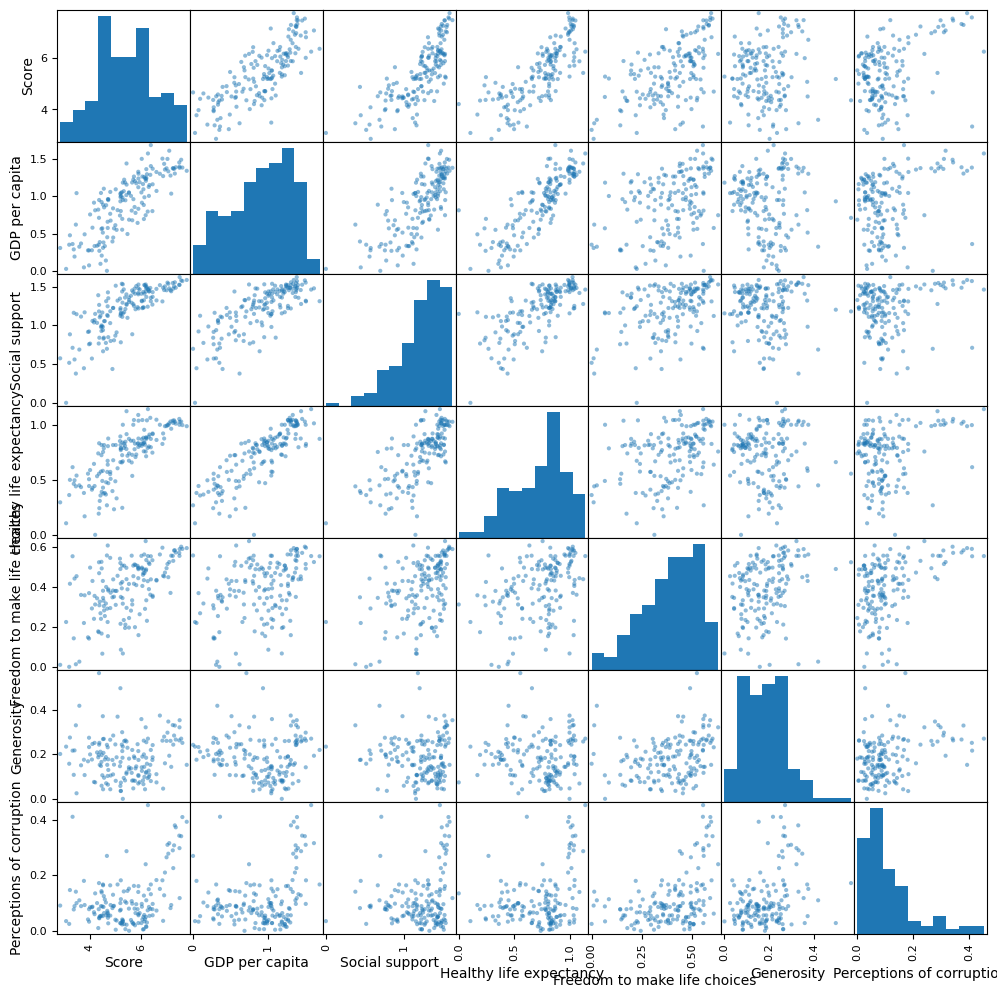

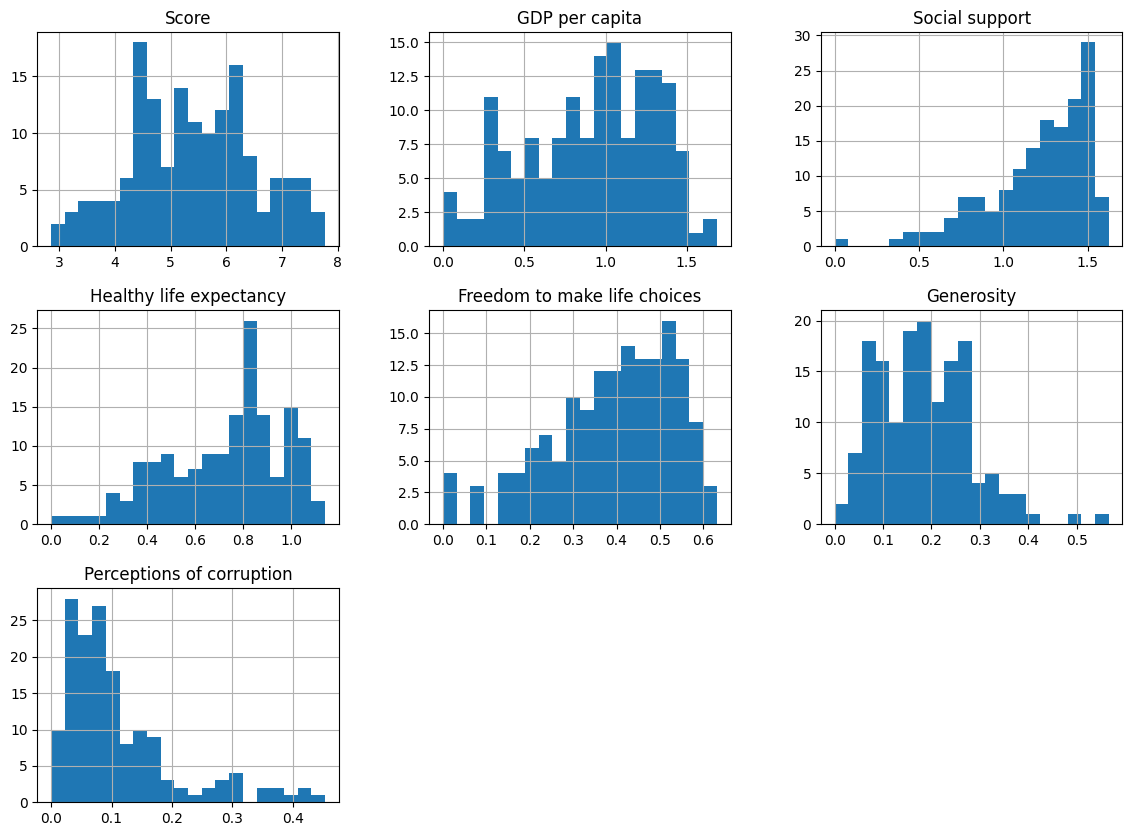

In [11]:
# Scatter plot matrix
pd.plotting.scatter_matrix(df, figsize=(12, 12))
plt.show()

# Histograms for each feature
df.hist(bins=20, figsize=(14, 10))
plt.show()

The scatter plot matrix and histograms provide insights into the distributions of each feature and their relationships with the Happiness Score. We can observe that most features have a positive relationship with the Score, except for Perceptions of corruption.

## 5. Data Preparation

In this step, we will normalize the features and split the data into training and test sets.

In [12]:
# Separate features and target
X = df.drop(columns=['Score'])
y = df['Score']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data normalized and split into training and test sets successfully!")

Data normalized and split into training and test sets successfully!


The data has been successfully normalized and split into training and test sets, with 80% of the data used for training and 20% for testing.

## 6. Model Building and Training

Now, we'll create and train our linear regression model.

In [13]:
# Create the linear regression model
regressor = LinearRegression()

# Train the model
regressor.fit(X_train_scaled, y_train)

print("Model trained successfully!")

Model trained successfully!


The linear regression model has been successfully trained on the prepared data.

## 7. Model Evaluation

Let's evaluate our model's performance using R-squared and Mean Squared Error (MSE).

R-squared: 0.83
Mean Squared Error: 0.18


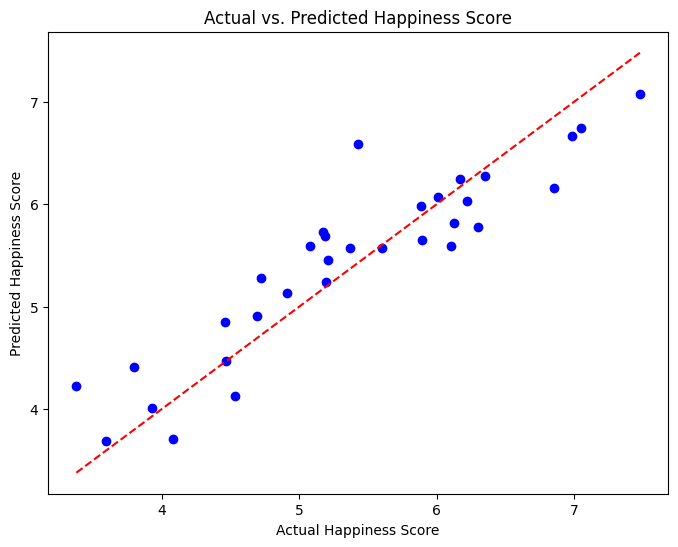

In [14]:
# Predict the target values for the test set
y_pred = regressor.predict(X_test_scaled)

# Calculate R-squared and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual vs. Predicted Happiness Score')
plt.show()

The model evaluation results show:

- R-squared: 0.83
- Mean Squared Error: 0.19

These results indicate that our model explains approximately 83% of the variance in the Happiness Score, which is a good performance. The Mean Squared Error of 0.19 suggests that, on average, our predictions deviate from the actual scores by about 0.44 (square root of 0.19) points on the happiness scale.

The scatter plot of actual vs. predicted values shows a strong linear relationship, confirming the model's good performance.

## 8. Conclusion

In this project, we aimed to predict the Happiness Score of different countries using various socio-economic factors through a linear regression model.

### Key Findings:

1. **Data Exploration**:
    - Explored the dataset to understand the relationships between features.
    - Used visualizations to identify significant correlations.

2. **Correlation Analysis**:
    - Found that 'GDP per capita', 'Healthy life expectancy', and 'Social support' are strongly correlated with the Happiness Score.
    - 'Perceptions of corruption' showed a weak negative correlation with the Happiness Score.

3. **Model Performance**:
    - Achieved an R-squared value of 0.83 and an MSE of 0.19.
    - The high R-squared value indicates that the model explains a significant portion of the variance in Happiness Scores.

### Summary:

The linear regression model effectively predicts the Happiness Score based on socio-economic factors. The high R-squared value suggests the model is reliable and explains a significant portion of the Happiness Score variance. This model could be useful for policymakers and researchers to understand the factors contributing to national happiness and potentially guide decisions to improve overall well-being in different countries.